<a href="https://colab.research.google.com/github/MaiCongTuanKiet/Artificial-Intelligence/blob/main/Tuan4_foodservicetip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


10.356410256410255


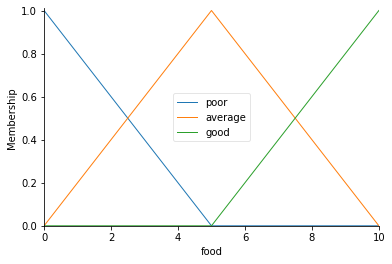

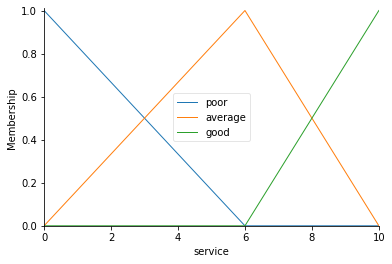

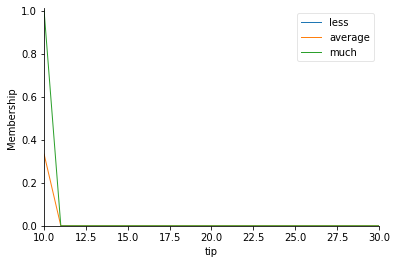

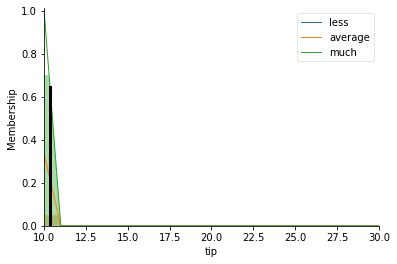

In [25]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']= fuzz.trimf(food.universe, [0,0,5])
food['average'] = fuzz.trimf(food.universe, [0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])
food.view()
service['poor'] = fuzz.trimf(service.universe, [0,0,6])
service['average'] = fuzz.trimf(service.universe, [0,6,10])
service['good'] = fuzz.trimf(service.universe, [6,10,10])
service.view()
tip['less'] = fuzz.trimf(tip.universe, [0,0,8])
tip['average'] = fuzz.trimf(tip.universe, [0,8,11])
tip['much'] = fuzz.trimf(tip.universe, [8,10,11])
tip.view()
rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['average'])
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['average'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['much'])
rule7 = ctrl.Rule(food['good'] & service['poor'], tip['less'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['average'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)